In [7]:
!pip install nengo
!pip install numpy
!pip install sklearn
!pip install  matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo
import nengo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


model = nengo.Network()
with model:
    a = nengo.Ensemble(n_neurons=500, 
                        dimensions=2)
    
    def stim_func(t):
        if t<0.1:
            return 1,1
        elif t<0.2:
            return 0,0
        elif t<0.3:
            return 0,1
        else:
            return 1,1
    
    stim = nengo.Node(stim_func)
    nengo.Connection(stim,a)
    
    output = nengo.Node(None, size_in=1)


    inputs = [[0,0],[1,1],[1,0],[0,1]]

    outputs = [[0],[0],[1],[1]]
    
    nengo.Connection(a,output, 
                    eval_points = inputs,
                    function=outputs)
    
    o = nengo.Probe(output)
    i = nengo.Probe(stim)


In [8]:
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(0.4)  

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [9]:
stim = sim.data[i]
result = sim.data[o]


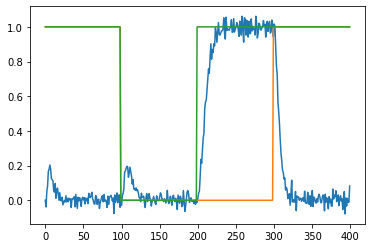

In [10]:
plt.plot(result)
plt.plot(stim)